In [42]:
import os
import pandas as pd
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Dropout, Flatten, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
image_dir = r'D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\'
os.chdir(image_dir)
os.listdir(image_dir)

train_csv=pd.read_csv("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train.csv")
train_csv['target'].value_counts()

X=train_csv['Image']
y=train_csv['target']

os.mkdir('D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\final_train_dir')
for i in train_csv['target'].unique():
    os.mkdir('final_train_dir\\'+i)
    
for i in train_csv['target'].unique():
    for j in X[y==i]:
        copyfile('D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\'+j, 'D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\final_train_dir\\'+i+'\\'+j)
        

In [2]:
# converting images to numoy arrays
train_data_array = ImageDataGenerator(rescale=1/255)
image_size = 200
train_data_generator = train_data_array.flow_from_directory("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\final_train_dir",
                                                           target_size=(image_size,image_size),
                                                           class_mode= 'sparse')

Found 364 images belonging to 8 classes.


In [3]:
# model building with keras
classifier = Sequential()

#Adding 1st convolution layer
classifier.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu', input_shape=(image_size,image_size,3)))
classifier.add(MaxPool2D(pool_size=(2, 2)))

#Adding 2nd convolution layer
classifier.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

#Adding 3rd convolution layer
classifier.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

#adding flatten layer
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(BatchNormalization())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(8, activation='softmax'))


In [4]:
# model compilation and fitting
classifier.compile(optimizer ='Adam' ,loss='sparse_categorical_crossentropy')
model = classifier.fit(train_data_generator, epochs=15, verbose=1)


Epoch 1/15
12/12 [==============================] - 30s 2s/step - loss: 2.1431
Epoch 2/15
12/12 [==============================] - 19s 2s/step - loss: 1.7546
Epoch 3/15
12/12 [==============================] - 19s 2s/step - loss: 1.1884
Epoch 4/15
12/12 [==============================] - 19s 2s/step - loss: 0.7437
Epoch 5/15
12/12 [==============================] - 18s 2s/step - loss: 0.3730
Epoch 6/15
12/12 [==============================] - 19s 2s/step - loss: 0.1809
Epoch 7/15
12/12 [==============================] - 18s 2s/step - loss: 0.0746
Epoch 8/15
12/12 [==============================] - 19s 2s/step - loss: 0.0438
Epoch 9/15
12/12 [==============================] - 19s 2s/step - loss: 0.0235
Epoch 10/15
12/12 [==============================] - 18s 2s/step - loss: 0.0250
Epoch 11/15
12/12 [==============================] - 19s 2s/step - loss: 0.0137
Epoch 12/15
12/12 [==============================] - 18s 2s/step - loss: 0.0149
Epoch 13/15
12/12 [=============================

In [5]:
#Saving model
classifier.save("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\Dance_classification.hdf5")

In [6]:
# converting images to numoy arrays
test_data_array = ImageDataGenerator(rescale=1/255)
image_size = 200
test_data_generator = test_data_array.flow_from_directory(r"D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\validation\\",
                                                           target_size=(image_size,image_size),batch_size=32,
                                                           class_mode=None,shuffle=False)

Found 156 images belonging to 1 classes.


In [58]:
#Making prediction on new data
pred=classifier.predict_generator(test_data_generator,verbose=1)
#print(pred)
predicted_class_indices=np.argmax(pred,axis=1)
#print(predicted_class_indices)
labels = (train_data_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#print(predictions)
filenames=test_data_generator.filenames
#print(filenames)
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(results)
#results["Filename"]=results["Filename"].apply(lambda x:x[7:])

#test_csv=pd.read_csv("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\test.csv")
results.to_csv('D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\results.csv')

"""results.set_index(["Filename"],inplace=True)
test_csv.set_index(["Image"],inplace=True)

output=test_csv.merge(results,left_index=True,right_index=True)
output.index.name='Image'
output.rename(columns={'Predictions':'target'},inplace=True)
output.to_csv('D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\submission12.csv')"""

5/5 [==============================] - 5s 936ms/step
         Filename    Predictions
0    test\108.jpg       manipuri
1     test\11.jpg         kathak
2    test\110.jpg       manipuri
3    test\112.jpg         kathak
4    test\114.jpg         kathak
..            ...            ...
151   test\86.jpg         kathak
152    test\9.jpg  bharatanatyam
153   test\92.jpg         kathak
154   test\95.jpg         kathak
155   test\97.jpg         kathak

[156 rows x 2 columns]


'results.set_index(["Filename"],inplace=True)\ntest_csv.set_index(["Image"],inplace=True)\n\noutput=test_csv.merge(results,left_index=True,right_index=True)\noutput.index.name=\'Image\'\noutput.rename(columns={\'Predictions\':\'target\'},inplace=True)\noutput.to_csv(\'D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\submission12.csv\')'

 predicted ------->  mohiniyattam


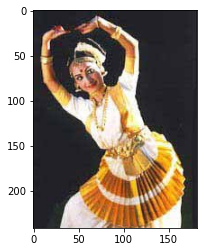

In [57]:
# Prediction on single image
from keras.preprocessing import image
%matplotlib inline

img_path = "D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\validation\\test\\256.jpg"
test_image = image.load_img(img_path, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

pred = classifier.predict(test_image)
#print(pred)
predicted_class_indices=np.argmax(pred,axis=1)
#print(predicted_class_indices)S
labels = (train_data_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#print(predictions)
img = mpimg.imread(img_path)
plt.imshow(img)

print(' predicted -------> ',predictions[0])
